# Reading and extracting texts from PDF

In [1]:
!pip install PyPDF2
!pip install pypdfium2
!pip install pytesseract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 43.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.4/326.4 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.4/130.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# PyPDF2

In [2]:
import PyPDF2
from pathlib import Path
import re

### Reading the pdf

In [3]:
pdf = PyPDF2.PdfReader ("/kaggle/input/pdf-dissertation/Rezuwan_Hassan_MS_thesis_dissertation_BRACU.pdf")

### Saving the entire pdf as txt file

In [4]:
with Path('Rezuwan_Hassan_MS_thesis_dissertation_BRACU.txt').open(mode='w') as output_file: 
    text = ''
    for page in pdf.pages:
        text += page.extract_text()
    output_file.write(text)

In [5]:
print(pdf.metadata) #document information
print()
print(len(pdf.pages)) #number of pages

{'/CreationDate': "D:20250104065246-00'00'", '/Creator': 'LaTeX with hyperref', '/Producer': 'xdvipdfmx (20220710)'}

121


### Get Page contents

In [6]:
page_18_object = pdf.pages[18]
print(page_18_object)

{'/Annots': IndirectObject(1013, 0, 138780887231568), '/Contents': [IndirectObject(36, 0, 138780887231568)], '/MediaBox': IndirectObject(1535, 0, 138780887231568), '/Parent': IndirectObject(1012, 0, 138780887231568), '/Resources': IndirectObject(454, 0, 138780887231568), '/Type': '/Page'}


In [7]:
page_18_text = page_18_object.extract_text()
print(page_18_text)

Bengali, which can limit users’ ability to communicate in their natural style. This
forces users to adapt to a more formal language, which can impede genuine com-
munication. The distinct morphology and various accents within Bengali further
complicate creating datasets that truly represent everyday language. Therefore,
having large, diverse datasets is crucial for training comprehensive deep-learning
models.
Progress in research and development has been hampered by a lack of resources,
such as automatic speech-to-text systems for Bengali dialects, text-to-speech systems
that include regional accents, and tools for dialect classification and transliteration
projects. The absence of these resources presents major obstacles to advancing these
technologies.
Accents are variations in pronunciation among speakers of the same language, while
dialects have unique linguistic traits specific to certain groups or regions. These
differences are shaped by geographic, cultural, and historical facto

In [8]:
page_16_object = pdf.pages[16]
page_16_text = page_16_object.extract_text()
print(page_16_text)

Chapter 1
Introduction
Language is fundamental for human expression and societal development, with struc-
tured language playing a pivotal role. In computer science, advancements in writ-
ten and spoken language recognition have rapidly evolved. This evolution aims
to enhance accessibility across various domains, including technology literacy and
disability support [ 19].
Advancements in speech and writing recognition have spurred innovations in fields
such as language education [ 38], language disorder assessment [ 21], and agricultural
assistance [ 81]. Despite these advancements, the application of Speech-to-T ext tech-
nology for regional variations of the Bengali language remains limited, largely as a
result of the shortage of resources and available datasets.
Still, As per updated studies, there is a significant gap in both theoretical and
computational linguistic studies focusing on regional Bengali variations, particularly
in the context of automatic speech recognition tasks. E

# pdfium

In [9]:
import pypdfium2 as pdfium
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [10]:
def convert_pdf_to_images(file_path, scale=300/72):
    
    pdf_file = pdfium.PdfDocument(file_path)  
    page_indices = [i for i in range(len(pdf_file))]
    
    renderer = pdf_file.render(
        pdfium.PdfBitmap.to_pil,
        page_indices = page_indices, 
        scale = scale,
    )
    
    list_final_images = [] 
    
    for i, image in zip(page_indices, renderer):
        
        image_byte_array = BytesIO()
        image.save(image_byte_array, format='jpeg', optimize=True)
        image_byte_array = image_byte_array.getvalue()
        list_final_images.append(dict({i:image_byte_array}))
    
    return list_final_images


def display_images(list_dict_final_images):
    
    all_images = [list(data.values())[0] for data in list_dict_final_images]

    for index, image_bytes in enumerate(all_images):

        image = Image.open(BytesIO(image_bytes))
        figure = plt.figure(figsize = (image.width / 100, image.height / 100))

        plt.title(f"----- Page Number {index+1} -----")
        plt.imshow(image)
        plt.axis("off")
        plt.show()

In [ ]:
convert_pdf_to_images = convert_pdf_to_images('/kaggle/input/pdf-dissertation/sample_pdf.pdf')
#convert_pdf_to_images

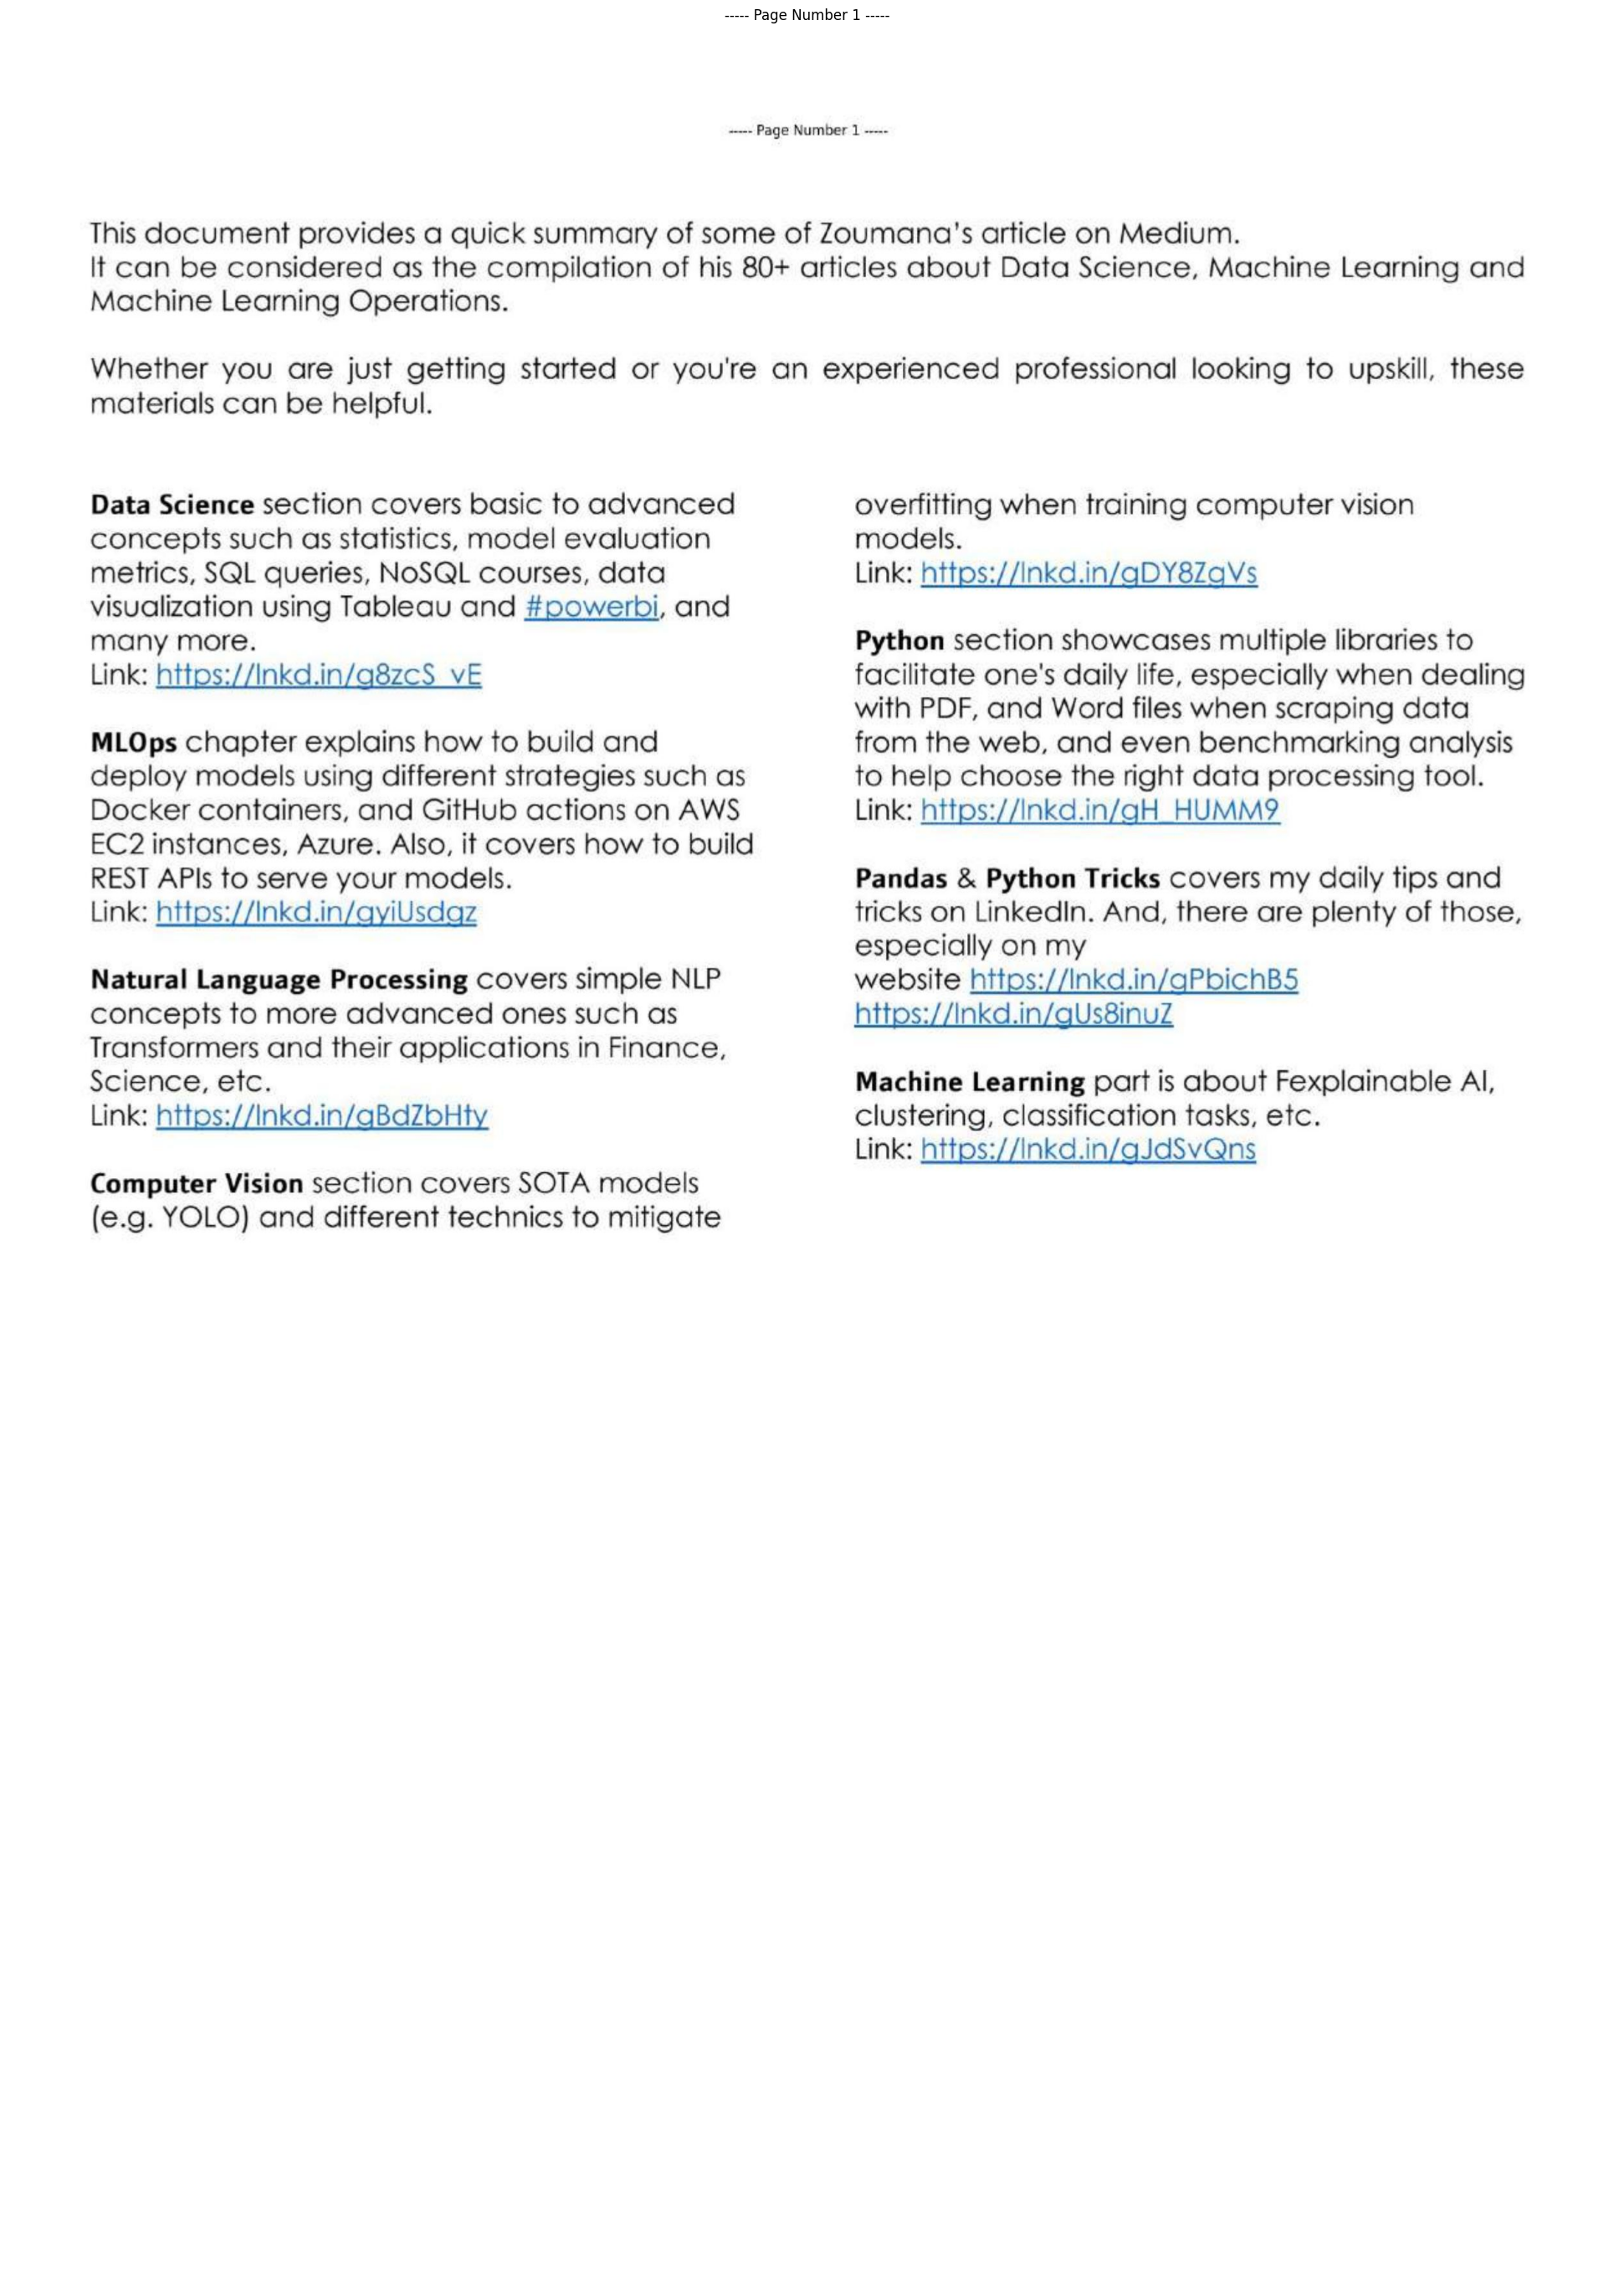

In [12]:
display_images(convert_pdf_to_images)

# PyTesseract

In [13]:
from pytesseract import image_to_string 

def extract_text_with_pytesseract(list_dict_final_images):
    
    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []
    
    for index, image_bytes in enumerate(image_list):
        
        image = Image.open(BytesIO(image_bytes))
        raw_text = str(image_to_string(image))
        image_content.append(raw_text)
    
    return "\n".join(image_content)


text_with_pytesseract = extract_text_with_pytesseract(convert_pdf_to_images)
print(text_with_pytesseract)

---- Page Number 1 -----

This document provides a quick summary of some of Zoumana’s article on Medium.
lt can be considered as the compilation of his 80+ articles about Data Science, Machine Learning and

Machine Learning Operations.

Whether you are just getting started or you're an experienced professional looking to upskill, these

materials can be helpful.

Data Science section covers basic to advanced
concepts such as statistics, model evaluation
metrics, SQL queries, NOSQL courses, data
visualization using Tableau and #powerbi, and
many more.

Link: httos://Inkd.in/a8zcS_vE

MLOps chapter explains how to build and
deploy models using different strategies such as
Docker containers, and GitHub actions on AWS
EC2 instances, Azure. Also, it covers how to build
REST APls to serve your models.

Link: https://Inkd.in/gyiUsdqz

Natural Language Processing Covers simple NLP
concepts to more advanced ones such as
Transformers and their applications in Finance,
Science, etc.

Link: https:

# EasyOCR

In [14]:
from easyocr import Reader
language_reader = Reader(["en"])

def extract_text_with_easyocr(list_dict_final_images):
    
    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []
    
    for index, image_bytes in enumerate(image_list):
        
        image = Image.open(BytesIO(image_bytes))
        raw_text = language_reader.readtext(image)
        raw_text = "\n".join([res[1] for res in raw_text])
                       
        image_content.append(raw_text)
    
    return "\n".join(image_content)


text_with_easy_ocr = extract_text_with_easyocr(convert_pdf_to_images)
print(text_with_easy_ocr)

~Page Number 1
This document provides a quick summary of some of Zoumana'$ article on Medium_
It can be considered as the
compilation of his 80+ articles about Data Science, Machine Learning and
Machine Learning Operations.
Whether YOU
are just getting started or YoUre
an experienced professional looking to upskill, these
materials can be helpful:
Data Science section covers basic to advanced
overfitting when training computer vision
concepts such as statistics, model evaluation
models:
metrics, SQL queries, NoSQL courses, data
Link: https [InkdinLcDY8ZqVs
visualization using Tableau and #powerbi, and
many more_
Python section showcases multiple libraries to
Link: https Lnkdin/g8zcS_vE
facilitate one's daily life , especially when dealing
with PDF, and Word files when scraping data
MLOps chapter explains how to build and
from the web, and even benchmarking analysis
deploy models using different strategies such as
to help choose the right data processing tool:
Docker containers, and Git